In [112]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Number of records
num_records = 1000

# Function to generate random dates between start and end date
def random_dates(start, end, n):
    start_u = start.value // 10**9
    end_u = end.value // 10**9
    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

# Generate data
np.random.seed(5)
app_nums = np.random.randint(100000, 1000000, size=num_records).astype(int)  # 6 digits float
submit_dates = random_dates(pd.to_datetime('2021-01-01'), pd.to_datetime('2024-07-01'), num_records)
statuses = np.random.choice(['approved', 'declined', 'reviewing'], size=num_records)
terms = np.random.uniform(6, 24, size=num_records).astype(int)  # Term 6 to 24 months
industries = np.random.choice(['construction', 'transportation', 'medical', 'software'], size=num_records)
funded = np.where(statuses == 'approved', 1, 0)  # Binary funding status
requested_amts = np.random.uniform(1000, 200000, size=num_records)  # Amount requested
downpayment_pct = np.random.uniform(0.0, 0.4, size=num_records)
downpayment_amts = requested_amts * downpayment_pct
funded_amts = requested_amts * (1 - downpayment_pct) * funded  # Amount funded only if status is 'approved'
states = np.random.choice(['AL', 'CA', 'NY', 'TX', 'FL', 'GA', 'IL', 'PA', 'OH', 'MI'], size=num_records)

# Create DataFrame
df = pd.DataFrame({
    'AppNum': app_nums,
    'SubmitDate': submit_dates,
    'Status': statuses,
    'Term': terms,
    'Industry': industries,
    'funded': funded,
    'RequestedAmt': requested_amts,
    'DownPayment_pct': downpayment_pct,
    'DownPayment_amt': downpayment_amts,
    'FundedAmt': funded_amts,
    'State': states
})


In [113]:
df

,AppNum,SubmitDate,Status,Term,Industry,funded,RequestedAmt,DownPayment_pct,DownPayment_amt,FundedAmt,State
0,397827,2024-04-17 10:26:50,declined,16,medical,0,197145.301574,0.142397,28072.975797,0.000000,PA
1,118638,2022-11-28 06:20:50,approved,8,medical,1,6013.774940,0.044169,265.621550,5748.153390,CA
2,644751,2021-01-02 18:39:24,approved,21,construction,1,69044.152471,0.155326,10724.338676,58319.813794,PA
3,224605,2024-02-12 14:45:09,approved,18,software,1,9642.583903,0.326985,3152.981077,6489.602825,AL
4,856710,2023-08-24 13:46:24,reviewing,20,medical,0,73872.877529,0.150059,11085.288107,0.000000,AL
...,...,...,...,...,...,...,...,...,...,...,...
995,574494,2021-11-24 14:07:03,approved,22,medical,1,29250.902652,0.389570,11395.283304,17855.619348,PA
996,638298,2022-11-27 06:17:43,reviewing,20,transportation,0,118892.522782,0.136081,16179.055190,0.000000,TX
997,722158,2021-05-23 03:57:29,declined,14,software,0,197230.481080,0.227682,44905.891313,0.000000,MI
998,721605,2024-04-13 04:01:09,approved,7,software,1,158814.579786,0.027135,4309.369958,154505.209828,PA


In [114]:
us_state_codes = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 
    'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 
    'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 
    'MD', 'MA', 'MI', 'MN', 'MS', 
    'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
    'NM', 'NY', 'NC', 'ND', 'OH', 
    'OK', 'OR', 'PA', 'RI', 'SC', 
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 
    'WA', 'WV', 'WI', 'WY'
]

# Generate random states using their two-letter codes
df['State'] = np.random.choice(us_state_codes, size=num_records)


In [115]:
# Determine the indices for the most recent 50 applications
recent_50_indices = df['SubmitDate'].nlargest(50).index

# Assign 'reviewing' status to the most recent 50 applications
statuses = np.random.choice(['approved', 'declined'], size=num_records)  # Default for all
statuses[recent_50_indices] = 'reviewing'  # Set the most recent 50 to 'reviewing'

# Update the 'Status' column in the DataFrame
df['Status'] = statuses

In [116]:
df['Status'].value_counts()

Status
approved    499
declined    451
reviewin     50
Name: count, dtype: int64

In [117]:
# Initialize new columns with default values based on Status
months_in_business = np.where(df['Status'] == 'declined', 
                              np.random.randint(12, 61, size=num_records),
                              np.where(df['Status'] == 'approved', 
                                       np.random.randint(50, 121, size=num_records), 
                                       np.random.randint(12, 121, size=num_records)))

Avg_B09_ScoreValue = np.where(df['Status'] == 'declined', 
                              np.random.uniform(500, 701, size=num_records),
                              np.where(df['Status'] == 'approved', 
                                       np.random.uniform(680, 801, size=num_records), 
                                       np.random.uniform(500, 801, size=num_records)))

L_MSV2_rawscore = np.where(df['Status'] == 'declined', 
                           np.random.uniform(600, 661, size=num_records),
                           np.where(df['Status'] == 'approved', 
                                    np.random.uniform(650, 801, size=num_records), 
                                    np.random.uniform(600, 801, size=num_records)))

# Add the new columns to the DataFrame
df['months_in_business'] = months_in_business
df['Avg_B09_ScoreValue'] = Avg_B09_ScoreValue
df['L_MSV2_rawscore'] = L_MSV2_rawscore


In [118]:
df

,AppNum,SubmitDate,Status,Term,Industry,funded,RequestedAmt,DownPayment_pct,DownPayment_amt,FundedAmt,State,months_in_business,Avg_B09_ScoreValue,L_MSV2_rawscore
0,397827,2024-04-17 10:26:50,declined,16,medical,0,197145.301574,0.142397,28072.975797,0.000000,TX,39,578.104874,642.713227
1,118638,2022-11-28 06:20:50,declined,8,medical,1,6013.774940,0.044169,265.621550,5748.153390,LA,30,529.472476,614.853490
2,644751,2021-01-02 18:39:24,declined,21,construction,1,69044.152471,0.155326,10724.338676,58319.813794,IL,20,550.891569,627.762054
3,224605,2024-02-12 14:45:09,approved,18,software,1,9642.583903,0.326985,3152.981077,6489.602825,LA,113,762.170955,679.479988
4,856710,2023-08-24 13:46:24,approved,20,medical,0,73872.877529,0.150059,11085.288107,0.000000,CO,72,702.891029,793.723522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,574494,2021-11-24 14:07:03,approved,22,medical,1,29250.902652,0.389570,11395.283304,17855.619348,ND,115,753.833526,673.528580
996,638298,2022-11-27 06:17:43,approved,20,transportation,0,118892.522782,0.136081,16179.055190,0.000000,ND,95,764.121533,717.388468
997,722158,2021-05-23 03:57:29,approved,14,software,0,197230.481080,0.227682,44905.891313,0.000000,GA,116,694.054847,701.583402
998,721605,2024-04-13 04:01:09,declined,7,software,1,158814.579786,0.027135,4309.369958,154505.209828,RI,53,526.659972,654.318751


In [119]:
df = df.round({
    'AppNum': 2,
    'Term': 2,
    'FundedAmt': 2,
    'DownPayment_pct': 2,
    'DownPayment_amt': 2,
    'Avg_B09_ScoreValue': 2,
    'L_MSV2_rawscore': 2
})

# Format SubmitDate to keep only the date in YYYY-MM-DD format
df['SubmitDate'] = df['SubmitDate'].dt.strftime('%Y-%m-%d')


In [120]:
def assign_score(series):
    return pd.qcut(series, q=4, labels=[0, 111, 222, 333]).astype(int)

# Apply the function to the relevant columns
df['score_months_in_business'] = assign_score(df['months_in_business'])
df['score_Avg_B09_ScoreValue'] = assign_score(df['Avg_B09_ScoreValue'])
df['score_L_MSV2_rawscore'] = assign_score(df['L_MSV2_rawscore'])

# Calculate the total score
df['total_score'] = df['score_months_in_business'] + df['score_Avg_B09_ScoreValue'] + df['score_L_MSV2_rawscore']


In [121]:
df['total_score'].value_counts()

total_score
777    181
222    163
111    153
888    150
666    100
0       76
333     60
999     49
555     48
444     20
Name: count, dtype: int64

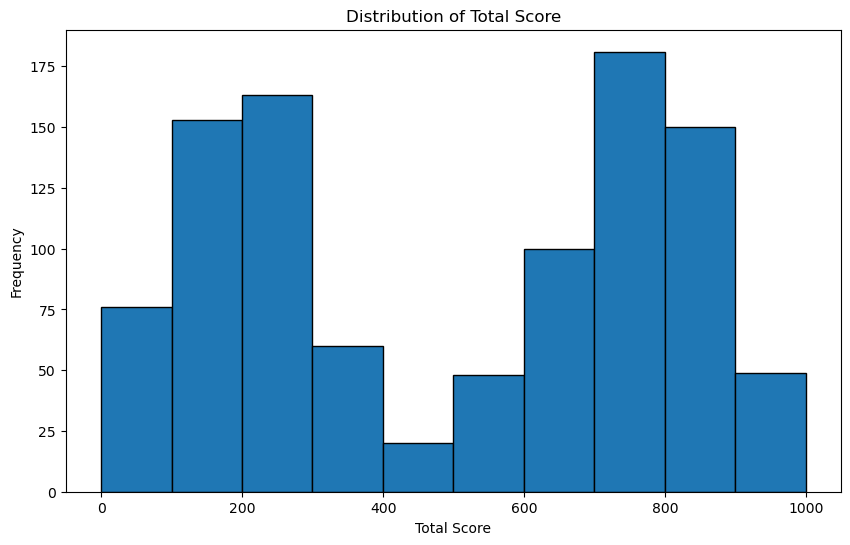

In [122]:
import matplotlib.pyplot as plt

# Plot the distribution of total_score
plt.figure(figsize=(10, 6))
df['total_score'].hist(bins=10, edgecolor='black')
plt.title('Distribution of Total Score')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [123]:
approved_lowest_scores = df[df['Status'] == 'approved'].sort_values(by='total_score').head(100)

# Display the result
approved_lowest_scores[['AppNum', 'SubmitDate', 'total_score']].reset_index(drop=True)

,AppNum,SubmitDate,total_score
0,352685,2021-11-02,333
1,332901,2024-03-13,444
2,666359,2023-04-09,444
3,279108,2021-12-25,444
4,425054,2024-03-29,444
...,...,...,...
95,368974,2024-03-21,666
96,292121,2022-07-13,666
97,275140,2021-06-13,666
98,494051,2021-10-03,666


In [124]:
def assign_risk_grade(score):
    if score <= 200:
        return 'E'
    elif score <= 400:
        return 'D'
    elif score <= 600:
        return 'C'
    elif score <= 800:
        return 'B'
    else:
        return 'A'

# Apply the function to create the risk_grade column
df['risk_grade'] = df['total_score'].apply(assign_risk_grade)


In [125]:
df['risk_grade']

0      D
1      E
2      E
3      A
4      B
      ..
995    A
996    A
997    B
998    D
999    B
Name: risk_grade, Length: 1000, dtype: object

In [126]:
#back office creation for approved deals

In [127]:
import pandas as pd
import numpy as np

# Get the list of application numbers with lowest scores
low_score_app_nums = approved_lowest_scores['AppNum'].tolist()
approved_df = df[df['Status'] == 'approved']

# Initialize an empty list to store the payment records
payment_records = []

# Function to get the end of the month date
def end_of_month(date):
    return (date.replace(day=1) + pd.DateOffset(months=1) - pd.DateOffset(days=1)).strftime('%d/%m/%Y')

# Generate payment records
for _, row in approved_df.iterrows():
    start_date = pd.to_datetime(row['SubmitDate'])
    term = int(np.ceil(row['Term']))  # Number of months for the term
    i_th_month = term // 2  # Calculate i-th month
    
    for month in range(term):
        payment_date = start_date + pd.DateOffset(months=month)
        
        if row['AppNum'] in low_score_app_nums and month >= i_th_month: #this makes sure it is only for the ones with the lowest scores amongst the approved ones. 
            # Assign a random delinquent value (0, 30, 45, 60, 90) for the i-th month and beyond
            delinquent_days = np.random.choice([0, 30, 45, 60, 90])
        else:
            delinquent_days = 0  # Set delinquent days to 0 otherwise
            
        payment_record = {
            'as_of_date': end_of_month(payment_date),
            'AppNum': row['AppNum'],
            'number_of_days_delinquent': delinquent_days
        }
        payment_records.append(payment_record)

# Create the df_bo dataframe
df_bo = pd.DataFrame(payment_records)

# Display the first few rows of df_bo to verify
df_bo.head(10)


,as_of_date,AppNum,number_of_days_delinquent
0,29/02/2024,224605,0
1,31/03/2024,224605,0
2,30/04/2024,224605,0
3,31/05/2024,224605,0
4,30/06/2024,224605,0
5,31/07/2024,224605,0
6,31/08/2024,224605,0
7,30/09/2024,224605,0
8,31/10/2024,224605,0
9,30/11/2024,224605,0


In [128]:
df_bo['number_of_days_delinquent'].value_counts()

number_of_days_delinquent
0     6541
30     153
45     153
60     149
90     132
Name: count, dtype: int64

In [129]:
ej1 = df_bo[df_bo['AppNum'] == 658088]
ej1

,as_of_date,AppNum,number_of_days_delinquent


In [130]:
# Function to calculate the outstanding balance month by month
def calculate_outstanding_balance(app_num, funded_amt, term, df_bo):
    # Initialize the balance with the funded amount
    balance = funded_amt
    monthly_payment = funded_amt / term
    
    # List to store the outstanding balance for each month
    balance_history = []
    
    # Iterate through the monthly records for this application number
    for _, row in df_bo[df_bo['AppNum'] == app_num].iterrows():
        if row['number_of_days_delinquent'] == 0:
            balance -= monthly_payment
        balance = max(balance, 0)  # Ensure the balance does not go below 0
        balance_history.append(balance)
    
    return balance_history

# Initialize the outstanding_balance column with NaN
df_bo['outstanding_balance'] = np.nan

# Calculate the outstanding balance for each application in df_bo
for app_num in df_bo['AppNum'].unique():
    # Get the corresponding funded amount and term from the main dataframe
    funded_amt = approved_df[approved_df['AppNum'] == app_num]['FundedAmt'].values[0]
    term = int(np.ceil(approved_df[approved_df['AppNum'] == app_num]['Term'].values[0]))
    
    # Calculate the outstanding balance history for this application
    balance_history = calculate_outstanding_balance(app_num, funded_amt, term, df_bo)
    
    # Assign the balance history to the df_bo dataframe
    df_bo.loc[df_bo['AppNum'] == app_num, 'outstanding_balance'] = balance_history

# Display the first few rows of df_bo to verify
df_bo


,as_of_date,AppNum,number_of_days_delinquent,outstanding_balance
0,29/02/2024,224605,0,6129.066667
1,31/03/2024,224605,0,5768.533333
2,30/04/2024,224605,0,5408.000000
3,31/05/2024,224605,0,5047.466667
4,30/06/2024,224605,0,4686.933333
...,...,...,...,...
7123,31/01/2024,465416,0,0.000000
7124,29/02/2024,465416,0,0.000000
7125,31/03/2024,465416,0,0.000000
7126,30/04/2024,465416,60,0.000000


In [131]:
df_bo['outstanding_balance'] = df_bo['outstanding_balance'].map('{:,.2f}'.format)
df_bo

,as_of_date,AppNum,number_of_days_delinquent,outstanding_balance
0,29/02/2024,224605,0,"6,129.07"
1,31/03/2024,224605,0,"5,768.53"
2,30/04/2024,224605,0,"5,408.00"
3,31/05/2024,224605,0,"5,047.47"
4,30/06/2024,224605,0,"4,686.93"
...,...,...,...,...
7123,31/01/2024,465416,0,0.00
7124,29/02/2024,465416,0,0.00
7125,31/03/2024,465416,0,0.00
7126,30/04/2024,465416,60,0.00


In [132]:
df_bo['def3012'] = 0
df_bo['def6012'] = 0
df_bo['def3018'] = 0
df_bo['def6018'] = 0
def set_delinquency_flags(app_num, df_bo):
    # Filter records for the given AppNum
    app_records = df_bo[df_bo['AppNum'] == app_num]
    
    # Check conditions for the first 12 months
    if (app_records.head(12)['number_of_days_delinquent'] >= 30).any():
        df_bo.loc[df_bo['AppNum'] == app_num, 'def3012'] = 1
    if (app_records.head(12)['number_of_days_delinquent'] >= 60).any():
        df_bo.loc[df_bo['AppNum'] == app_num, 'def6012'] = 1
    
    # Check conditions for the first 18 months
    if (app_records.head(18)['number_of_days_delinquent'] >= 30).any():
        df_bo.loc[df_bo['AppNum'] == app_num, 'def3018'] = 1
    if (app_records.head(18)['number_of_days_delinquent'] >= 60).any():
        df_bo.loc[df_bo['AppNum'] == app_num, 'def6018'] = 1

# Apply the function to all AppNums in df_bo
for app_num in df_bo['AppNum'].unique():
    set_delinquency_flags(app_num, df_bo)


In [133]:
# Function to calculate chargeoff_amt
def calculate_chargeoff_amt(app_num, df_bo):
    app_records = df_bo[df_bo['AppNum'] == app_num]
    # Check if there is any delinquency
    if (app_records['number_of_days_delinquent'] != 0).any():
        # Set chargeoff_amt as the last outstanding_balance multiplied by a random number
        last_balance = float(app_records['outstanding_balance'].iloc[-1].replace(',', ''))  # Convert to float
        multiplier = np.random.choice([0.70, 0.80, 0.90, 1.00])
        chargeoff_amt = last_balance * multiplier
        df_bo.loc[df_bo['AppNum'] == app_num, 'chargeoff_amt'] = chargeoff_amt

# Apply the function to all AppNums in df_bo
for app_num in df_bo['AppNum'].unique():
    calculate_chargeoff_amt(app_num, df_bo)



In [134]:
ej1 = df_bo[df_bo['AppNum'] == 292487]
ej1

,as_of_date,AppNum,number_of_days_delinquent,outstanding_balance,def3012,def6012,def3018,def6018,chargeoff_amt
110,31/03/2023,292487,0,"80,262.74",0,0,0,0,NaN
111,30/04/2023,292487,0,"70,229.90",0,0,0,0,NaN
112,31/05/2023,292487,0,"60,197.05",0,0,0,0,NaN
113,30/06/2023,292487,0,"50,164.21",0,0,0,0,NaN
114,31/07/2023,292487,0,"40,131.37",0,0,0,0,NaN
115,31/08/2023,292487,0,"30,098.53",0,0,0,0,NaN
116,30/09/2023,292487,0,"20,065.68",0,0,0,0,NaN
117,31/10/2023,292487,0,"10,032.84",0,0,0,0,NaN
118,30/11/2023,292487,0,0.00,0,0,0,0,NaN


In [135]:
df_bo_agg = df_bo.groupby('AppNum').agg({
    'as_of_date': 'last',  # Last as termination_date
    'AppNum': 'first',  # First occurrence of AppNum
    'number_of_days_delinquent': ['max', 'last'],  # Max and last value
    'outstanding_balance': 'min',  # Min value
    'def3012': 'max',  # Max value
    'def6012': 'max',  # Max value
    'def3018': 'max',  # Max value
    'def6018': 'max',  # Max value
    'chargeoff_amt': lambda x: x.max(skipna=True)  # Max value that is not NaN
}).reset_index(drop=True)

# Flatten the column names
df_bo_agg.columns = [
    'termination_date',
    'AppNum', 
    'number_of_days_delinquent_max', 
    'number_of_days_delinquent_last', 
    'outstanding_balance_min', 
    'def3012_max', 
    'def6012_max', 
    'def3018_max', 
    'def6018_max', 
    'chargeoff_amt_max'
]

In [136]:
df_bo_agg

,termination_date,AppNum,number_of_days_delinquent_max,number_of_days_delinquent_last,outstanding_balance_min,def3012_max,def6012_max,def3018_max,def6018_max,chargeoff_amt_max
0,31/05/2022,100044,30,30,0.00,1,0,1,0,0.000
1,31/03/2024,100632,0,0,0.00,0,0,0,0,NaN
2,31/10/2024,114765,0,0,0.00,0,0,0,0,NaN
3,31/03/2025,115668,0,0,0.00,0,0,0,0,NaN
4,30/09/2022,119157,90,0,"109,380.15",1,1,1,1,42189.489
...,...,...,...,...,...,...,...,...,...,...
494,31/08/2025,991391,0,0,0.00,0,0,0,0,NaN
495,31/07/2022,994327,0,0,0.00,0,0,0,0,NaN
496,31/08/2022,996672,0,0,0.00,0,0,0,0,NaN
497,30/11/2024,996896,0,0,0.00,0,0,0,0,NaN


In [137]:
merged_df = pd.merge(df,df_bo_agg,on='AppNum',how='left')

In [138]:
merged_df['def3012_max'].value_counts()

def3012_max
0.0    402
1.0     97
Name: count, dtype: int64

In [139]:
df.to_csv('1_front_office_mockup.csv')
df_bo.to_csv('2_back_office_data_mockup.csv')
merged_df.to_csv('3_merged_fo_bo_mockup.csv')